Firstly, we read the image and find some caracterstics of loaded image
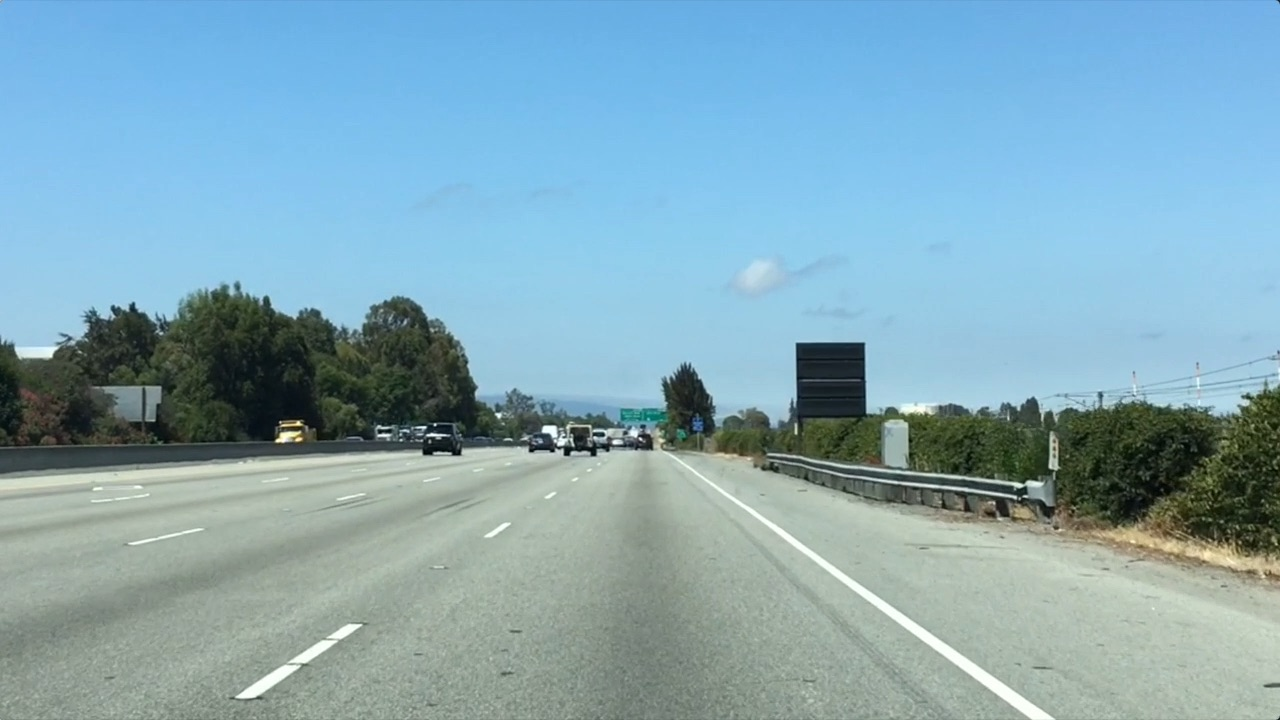
Image Credit : Udacity

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np

# Read test image
frame = img.imread('test.jpg')

height              = frame.shape[0]
width               = frame.shape[1]
color_frame         = np.copy(frame)
line_frame          = np.copy(frame)
zone_interest_frame = np.copy(frame)

We will define RGB thresholds for color selection, we will only chosse pixels that are near to white.
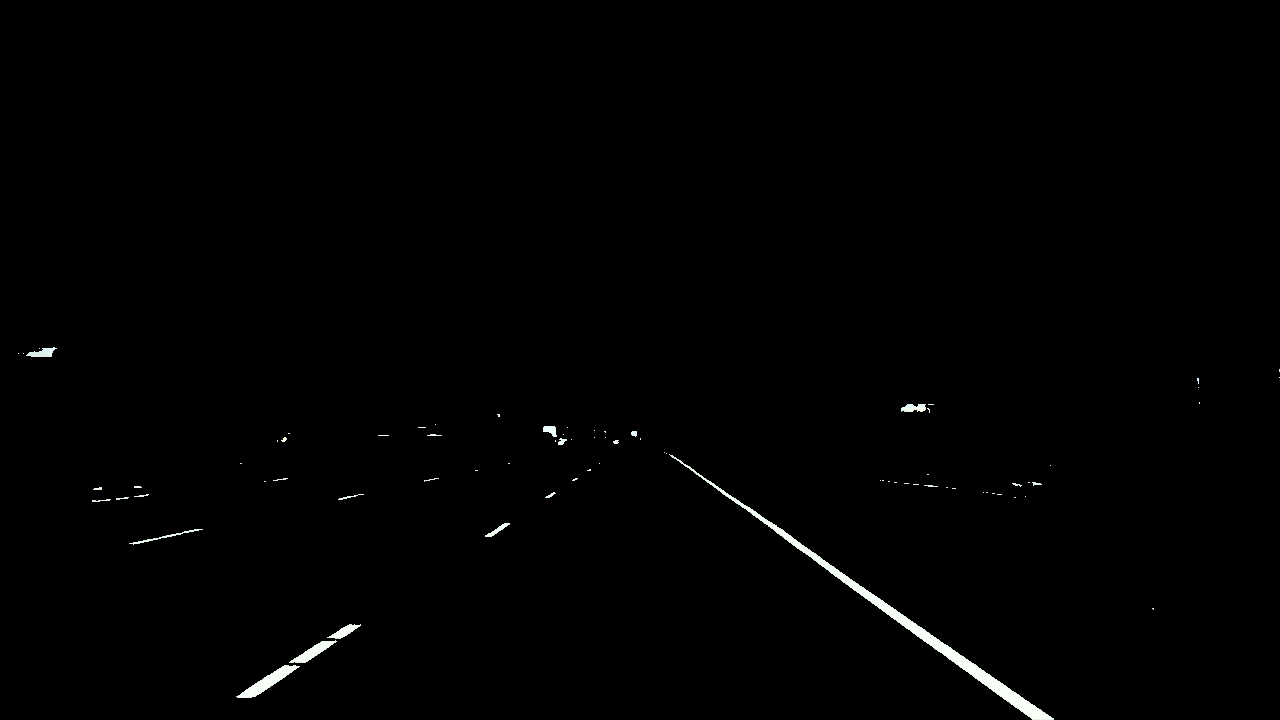

In [2]:
# Define color selection threshold
red_thd     = 215
green_thd   = 215
blue_thd    = 215

# Define selection by color / below the threshold
color_selection = ~((frame[:,:,0] < red_thd) | \
                    (frame[:,:,1] < green_thd) | \
                    (frame[:,:,2] < blue_thd))

We will define our zone of interest defined by a simple triangle to eliminate any un-welcomed detection.
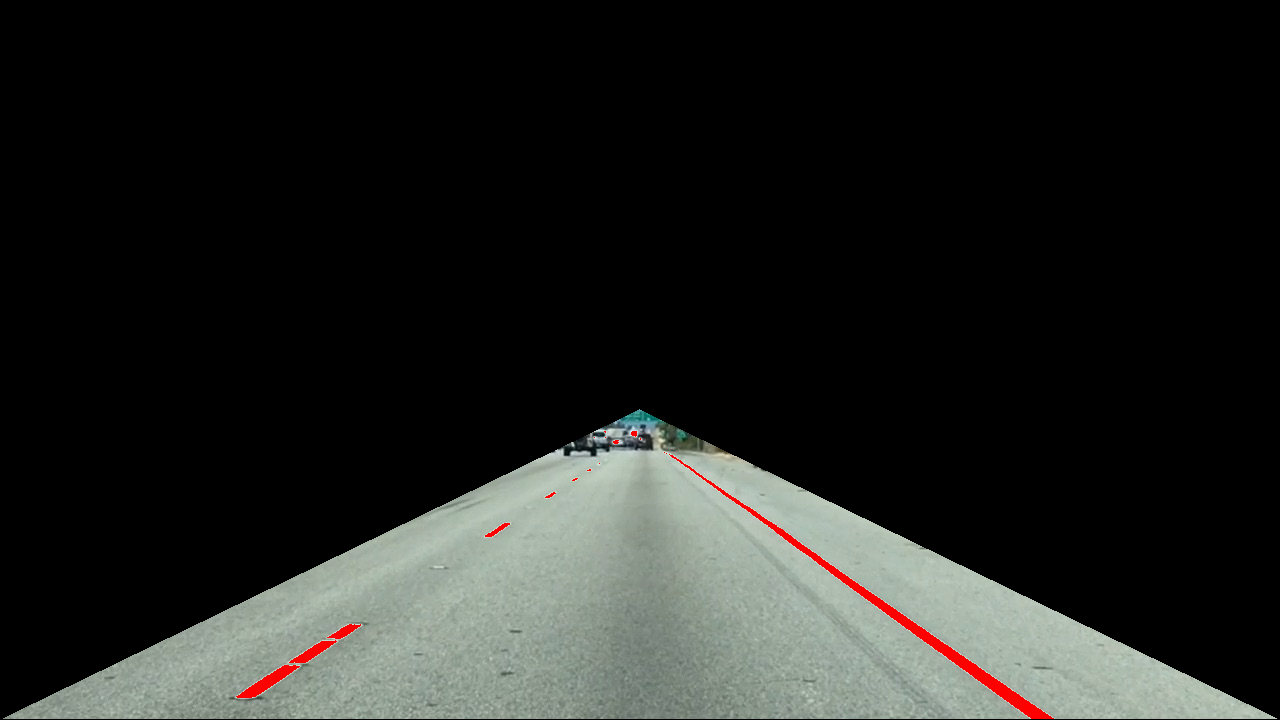

In [3]:
# Define zone of interest inside a triangle found by left_bottom, right_bottom and apex
left_bottom     = [0, np.int(height) - 1]
right_bottom    = [np.int(width) - 1, np.int(height) - 1]
apex_height     = np.int((height-1)/2) + 50
apex            = [np.int((width - 1)/2), apex_height]

fit_left        = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right       = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom      = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

[XX, YY]            = np.meshgrid(np.arange(0,width), np.arange(0,height))
region_selection    = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

Now, we have everything necessary to process with pixels selection. We color selected pixel and set unselected in Black color.

In [4]:
# Mask by color selection
color_frame[~color_selection] = [0, 0, 0]

# Mask by zone of interest and line detection
zone_interest_frame[~region_selection] = [0, 0, 0]
zone_interest_frame[color_selection & region_selection] = [255, 0, 0]
                    
# Line dection by color selection and zone of interest / put it in Red color
line_frame[color_selection & region_selection]     = [255, 0 ,0]
line_frame[~(color_selection & region_selection)]  = [0, 0 ,0]        


Let's display our results.

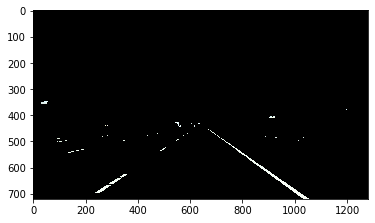

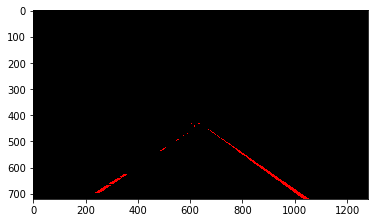

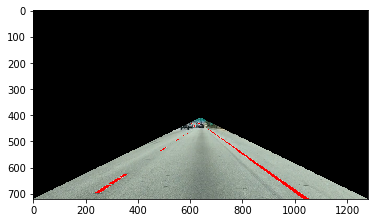

In [5]:
# Display the result
plt.figure()
plt.imshow(color_frame)
plt.imsave('frame_color_selection.png', color_frame)

plt.figure()
plt.imshow(line_frame)
plt.imsave('frame_line_dection.png', line_frame)

plt.figure()
plt.imshow(zone_interest_frame)
plt.imsave('frame_zone_of_interest.png', zone_interest_frame)